# 数値解析第１０回課題

### 学籍番号：08B22182　氏名：平山聖輝

課題10

$$
\frac{dy}{dx}-y=-x^3,  y(0)=1
$$

に対して， $ y(0.1) $ を
* オイラー法
* ２次のルンゲクッタ法
* ４次のルンゲクッタ法
を用いて計算せよ．ただし，刻み幅 $h=0.1$ とする．

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sp

### 初期設定

In [67]:
x, C1 = sp.symbols('x C1') #複数の変数を名付ける
y = sp.Function('y')
y_diff = y(x) - x**3
y0 = 1
xe = 0.1
display(y_diff)

-x**3 + y(x)

よって一般解はsolverを使うと以下のようになる．

In [13]:
eq = sp.Eq(y(x).diff(x), y_diff) #sympy.Eq()は第一引数＝第二引数を解く
ys = sp.dsolve(eq)
display(ys)

Eq(y(x), C1*exp(x) + x**3 + 3*x**2 + 6*x + 6)

よって初期値$y(0)=1$を代入すると積分定数も求めることができる．

In [15]:
eqc = sp.Eq(ys.rhs.subs(x,0), y0) #rhsはright hand sideで右辺の意味
c = sp.solve(eqc)
ys2 = ys.subs(C1, c[0])
display(ys2)

Eq(y(x), x**3 + 3*x**2 + 6*x - 5*exp(x) + 6)

プロットしてみると理論解は以下のようになる．

In [168]:
N = 10
h = 1/N
xt = np.linspace(0,xe,N+1)
yt = [ys2.rhs.subs(x,n) for n in xx]
print('y_theorical(0.1) =', yy[-1])

y_theorical(0.1) = 1.10514540962176


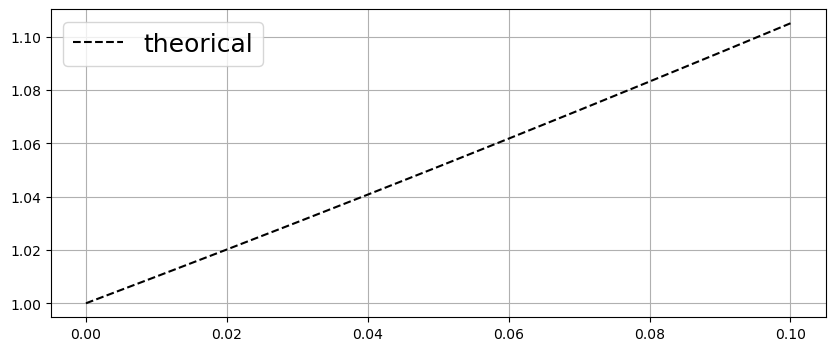

In [170]:
plt.figure(figsize = (10,4))
plt.plot(xt, yt, 'k', label = "theorical", linestyle = "dashed")
plt.grid()
plt.legend(fontsize = 18)
plt.show()

$$
y_{theory}(0.1) = 1.10514540962176
$$

### オイラー法

微分方程式が以下のように与えられているとする．

$$
\frac{\partial{y}}{\partial{x}} = g(x,y)
$$

このとき，オイラー法とは以下の更新則で微分方程式を計算する手法である．

$$
y_{i+1} = y_{i} + hg(x_{i}, y_{i})
$$

In [182]:
def calcEuler(f, x0, y0, xe, h):
    xx = [x0]
    yy = [y0]
    step = (int)((xe - x0)/h)
    i = 0

    for i in range(step):
        yy.append(yy[i] + h * f.subs([(y(x), yy[i]), (x, xx[i])]))
        xx.append(xx[i] + h)

    return xx, yy

オイラー法の結果は以下のようにプロットされる．

In [185]:
xo, yo = calcEuler(y_diff, 0, y0, xe, h)
print('y_euler(0.1) = ', yo[-1])

y_euler(0.1) =  1.10000000000000


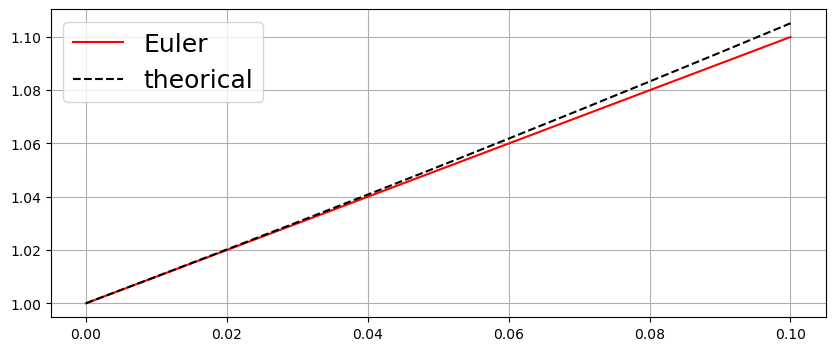

In [172]:
plt.figure(figsize = (10, 4))
plt.plot(xo, yo, 'r', label = "Euler")
plt.plot(xt, yt, 'k', label = "theorical", linestyle = "dashed")
plt.grid()
plt.legend(fontsize = 18)
plt.show()

よってオイラー法のときの$ y(0.1) $は以下
$$
y_{E}(0.1) = 1.1
$$

### ルンゲクッタ（二次）

二次のルンゲクッタ法による更新則は以下．

$$
\begin{align}
k_1 &= g(x_i, y_i) \\
k_2 &= g(x_i + h, y_i + hk_1) \\
y_{i+1} &= y_i + \frac{h}{2}(k_1 + k_2)
\end{align}
$$

In [241]:
def calcRungeKutte2(f, x0, y0, xe, h):
    xx = [x0]
    yy = [y0]
    step = (int)((xe - x0)/h)

    for i in range(step):
        k1 = f.subs([(y(x), yy[i]), (x, xx[i])])
        k2 = f.subs([(y(x), yy[i] + h*k1), (x, xx[i] + h)])
        
        yy.append(yy[i] + (h/2)*(k1 + k2))
        xx.append(xx[i] + h)

    return xx, yy

よって二次のルンゲクッタ法をプロットすると以下のようになる．

In [244]:
xr2, yr2 = calcRungeKutte2(y_diff, 0, y0, xe, h)
print('y_RK2(0.1) = ', yr2[-1])
yr2

y_RK2(0.1) =  1.10495000000000


[1, 1.10495000000000]

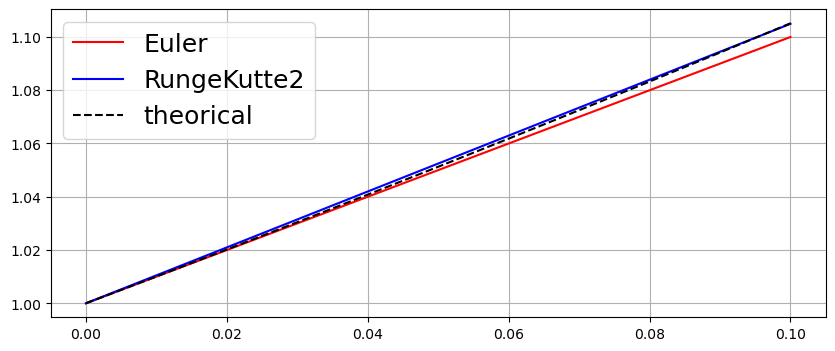

In [192]:
plt.figure(figsize = (10, 4))
plt.plot(xo, yo, 'r', label = "Euler")
plt.plot(xr2, yr2, 'b', label = "RungeKutte2")
plt.plot(xt, yt, 'k', label = "theorical", linestyle = "dashed")
plt.grid()
plt.legend(fontsize = 18)
plt.show()

したがって二次のルンゲクッタ法で求めた$y(0.1)$は以下．

$$
y_{RK2}(0.1) = 1.10495000000000
$$

### ルンゲクッタ（四次）

四次のルンゲクッタ法は以下の更新則にて求められる．

$$
\begin{align}
k_1 &= g(x_i, y_i) \\
k_2 &= g(x_i + \frac{h}{2} , y_i + \frac{h}{2}k_1) \\
k_3 &= g(x_i + \frac{h}{2} , y_i + \frac{h}{2}k_2) \\
k_4 &= g(x_i + h , y_i + hk_3) \\
y_{i+1} &= y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align}
$$

In [246]:
def calcRungeKutte4(f, x0, y0, xe, h):
    xx = [x0]
    yy = [y0]
    step = (int)((xe - x0)/h)

    for i in range(0,step):
        k1 = f.subs([(y(x), yy[i]), (x, xx[i])])
        k2 = f.subs([(y(x), yy[i] + (h/2)*k1), (x, xx[i] + (h/2))])
        k3 = f.subs([(y(x), yy[i] + (h/2)*k2), (x, xx[i] + (h/2))])
        k4 = f.subs([(y(x), yy[i] + h*k3), (x, xx[i] + h)])
        
        yy.append(yy[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4))
        xx.append(xx[i] + h)

    return xx, yy

In [248]:
xr4, yr4 = calcRungeKutte4(y_diff, 0, y0, xe, h)
print('y_RK4(0.1) = ', yr4[-1])

y_RK4(0.1) =  1.10514540625000


よって四次のルンゲクッタ法もプロッタした図は以下のようになる．

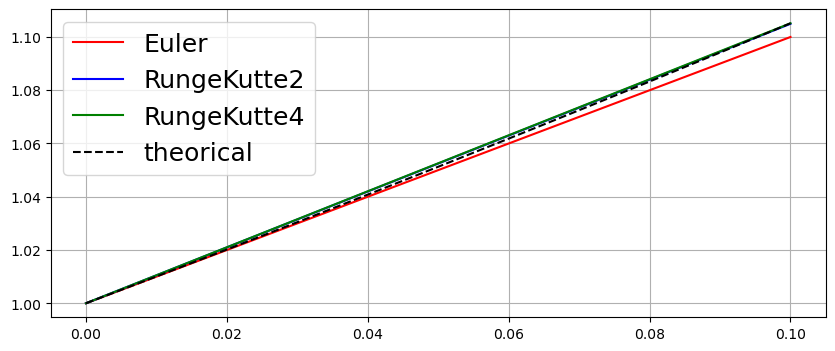

In [251]:
plt.figure(figsize = (10, 4))
plt.plot(xo, yo, 'r', label = "Euler")
plt.plot(xr2, yr2, 'b', label = "RungeKutte2")
plt.plot(xr4, yr4, 'g', label = "RungeKutte4")
plt.plot(xt, yt, 'k', label = "theorical", linestyle = "dashed")
plt.grid()
plt.legend(fontsize = 18)
plt.show()

$$
y_{RK4}(0.1) = 1.10514540625000
$$

### 0～10の範囲に拡張する

範囲を0～0.1ではなく0～10に変えてプロットする

In [269]:
xe_w = 10
xt_w = np.linspace(0,xe_w, (int)(xe_w/h))
yt_w = [ys2.rhs.subs(x,n) for n in xt_w]
xo_w, yo_w = calcEuler(y_diff, 0, y0, xe_w, h)
xr2_w, yr2_w = calcRungeKutte2(y_diff, 0, y0, xe_w, h)
xr4_w, yr4_w = calcRungeKutte4(y_diff, 0, y0, xe_w, h)

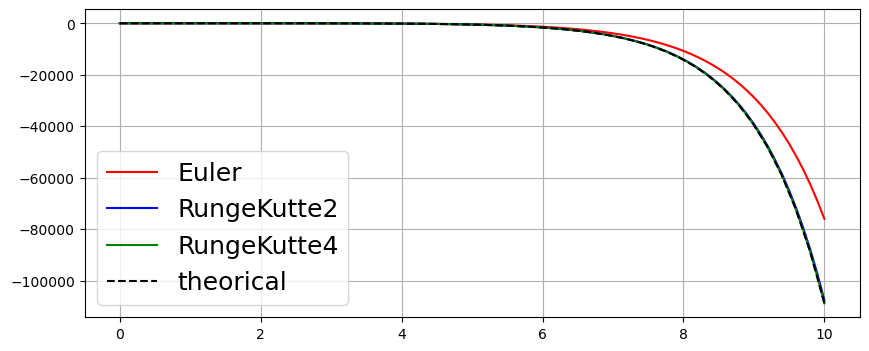

In [263]:
plt.figure(figsize = (10, 4))
plt.plot(xo_w, yo_w, 'r', label = "Euler")
plt.plot(xr2_w, yr2_w, 'b', label = "RungeKutte2")
plt.plot(xr4_w, yr4_w, 'g', label = "RungeKutte4")
plt.plot(xt_w, yt_w, 'k', label = "theorical", linestyle = "dashed")
plt.grid()
plt.legend(fontsize = 18)
plt.show()